<a href="https://colab.research.google.com/github/Enriquebadenas/Workshop_ML1/blob/main/workshop_algarve_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go 
from scipy.stats import t
from scipy import stats

In [2]:
url = 'https://raw.githubusercontent.com/aloa04/workshop-algarve-analysis/main/H1.csv'
data = pd.read_csv(url)

In [3]:
data.head()

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
0,0,342,2015,July,27,1,0,0,2,0,...,No Deposit,NULL,NULL,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,0,737,2015,July,27,1,0,0,2,0,...,No Deposit,NULL,NULL,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,0,7,2015,July,27,1,0,1,1,0,...,No Deposit,NULL,NULL,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,0,13,2015,July,27,1,0,1,1,0,...,No Deposit,304,NULL,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,0,14,2015,July,27,1,0,2,2,0,...,No Deposit,240,NULL,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [5]:
data.shape

(40060, 31)

In [7]:
data.dtypes

IsCanceled                       int64
LeadTime                         int64
ArrivalDateYear                  int64
ArrivalDateMonth                object
ArrivalDateWeekNumber            int64
ArrivalDateDayOfMonth            int64
StaysInWeekendNights             int64
StaysInWeekNights                int64
Adults                           int64
Children                         int64
Babies                           int64
Meal                            object
Country                         object
MarketSegment                   object
DistributionChannel             object
IsRepeatedGuest                  int64
PreviousCancellations            int64
PreviousBookingsNotCanceled      int64
ReservedRoomType                object
AssignedRoomType                object
BookingChanges                   int64
DepositType                     object
Agent                           object
Company                         object
DaysInWaitingList                int64
CustomerType             

In [4]:
data.isnull().sum()

IsCanceled                       0
LeadTime                         0
ArrivalDateYear                  0
ArrivalDateMonth                 0
ArrivalDateWeekNumber            0
ArrivalDateDayOfMonth            0
StaysInWeekendNights             0
StaysInWeekNights                0
Adults                           0
Children                         0
Babies                           0
Meal                             0
Country                        464
MarketSegment                    0
DistributionChannel              0
IsRepeatedGuest                  0
PreviousCancellations            0
PreviousBookingsNotCanceled      0
ReservedRoomType                 0
AssignedRoomType                 0
BookingChanges                   0
DepositType                      0
Agent                            0
Company                          0
DaysInWaitingList                0
CustomerType                     0
ADR                              0
RequiredCarParkingSpaces         0
TotalOfSpecialReques

In [16]:
data['Children'].describe()

count    40060.000000
mean         0.128682
std          0.445195
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         10.000000
Name: Children, dtype: float64

In [20]:
data['Children'].isna().sum()

0

¿Por qué quitamos los na de Children si no hay?
Y los otros cambios sobre Agent y Company. Habrá que justificarlos.

In [22]:
data['Country'].describe()

count     39596
unique      125
top         PRT
freq      17630
Name: Country, dtype: object

In [21]:
data['Country'].isna().sum()

464

In [25]:
df=data.copy()
df['Children'].fillna(0,inplace=True)
df['Country'].fillna(value=df['Country'].mode()[0],inplace=True)
df.drop(['Company'],axis=1,inplace=True)
df['Agent'].fillna(0,inplace=True)

In [26]:
df.head()

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,BookingChanges,DepositType,Agent,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
0,0,342,2015,July,27,1,0,0,2,0,...,3,No Deposit,NULL,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,0,737,2015,July,27,1,0,0,2,0,...,4,No Deposit,NULL,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,0,7,2015,July,27,1,0,1,1,0,...,0,No Deposit,NULL,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,0,13,2015,July,27,1,0,1,1,0,...,0,No Deposit,304,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,0,14,2015,July,27,1,0,2,2,0,...,0,No Deposit,240,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [27]:
df.isnull().sum()

IsCanceled                     0
LeadTime                       0
ArrivalDateYear                0
ArrivalDateMonth               0
ArrivalDateWeekNumber          0
ArrivalDateDayOfMonth          0
StaysInWeekendNights           0
StaysInWeekNights              0
Adults                         0
Children                       0
Babies                         0
Meal                           0
Country                        0
MarketSegment                  0
DistributionChannel            0
IsRepeatedGuest                0
PreviousCancellations          0
PreviousBookingsNotCanceled    0
ReservedRoomType               0
AssignedRoomType               0
BookingChanges                 0
DepositType                    0
Agent                          0
DaysInWaitingList              0
CustomerType                   0
ADR                            0
RequiredCarParkingSpaces       0
TotalOfSpecialRequests         0
ReservationStatus              0
ReservationStatusDate          0
dtype: int

In [29]:
df['IsCanceled'].describe()

count    40060.000000
mean         0.277634
std          0.447837
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: IsCanceled, dtype: float64

In [37]:
df['IsCanceled'].value_counts()

0    28938
1    11122
Name: IsCanceled, dtype: int64

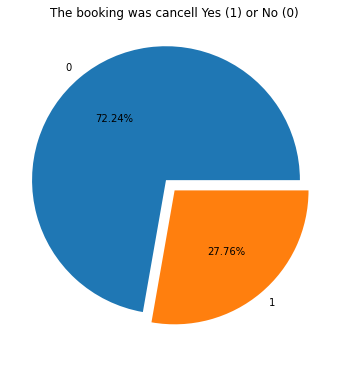

In [36]:
df['IsCanceled']
plt.rcParams['figure.figsize']=6,9
plt.pie(df['IsCanceled'].value_counts(),labels=df['IsCanceled'].value_counts().index,autopct='%1.2f%%',explode=(0.1,0))
plt.title('The booking was cancell Yes (1) or No (0)')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Cancellation rate')

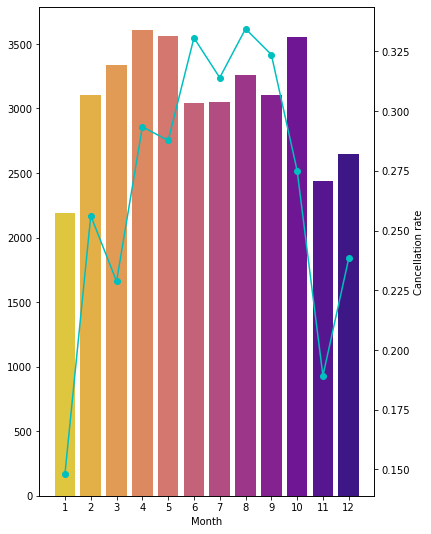

In [38]:
ordered_months = [
    "January", "February", "March", "April", "May", "June", "July", "August",
    "September", "October", "November", "December"
]
fig,ax1=plt.subplots()
ax2=ax1.twinx()
monthly=df.groupby('ArrivalDateMonth').size()
monthly/2
monthly.loc[['July', 'August']] = monthly.loc[['July', 'August']] * 2 / 3
sns.barplot(list(range(1, 13)), monthly[ordered_months], ax=ax1,palette="plasma_r")
ax2.plot(
    range(12), df.groupby('ArrivalDateMonth')['IsCanceled'].mean()[ordered_months].values,'co-')
ax1.set_xlabel('Month')
ax2.set_ylabel('Cancellation rate')

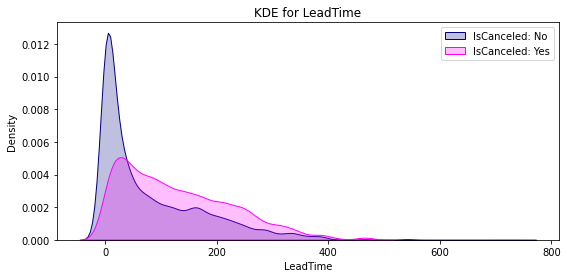

In [40]:
def kdeplot(feature,xlabel):
    plt.figure(figsize=(9, 4))
    plt.title("KDE for {0}".format(feature))
    ax0 = sns.kdeplot(df[df['IsCanceled'] == 0][feature].dropna(), color= 'navy', label= 'IsCanceled: No', shade='True')
    ax1 = sns.kdeplot(df[df['IsCanceled'] == 1][feature].dropna(), color= 'magenta', label= 'IsCanceled: Yes',shade='True')
    plt.xlabel(xlabel)
    
    plt.rcParams.update({'font.size': 15})
    plt.legend(fontsize=10)
 
%matplotlib inline
kdeplot('LeadTime','LeadTime')

In [45]:
canceled = df[df["IsCanceled"].isin(["1"])]
uncanceled = df[df["IsCanceled"].isin(["0"])]

In [46]:
def get_country(df, n):
    country_data = df.groupby(['Country']).size().reset_index(name='counts')
    country_data = country_data.sort_values('counts')
    return country_data.tail(n)

In [58]:
country_list = get_country(df,35).sort_values('Country', ascending = False)
print(country_list)

    Country  counts
118     USA     479
116     UKR      23
107     SWE     304
98      RUS     189
97      ROU     177
95      PRT   18094
93      POL     333
85      NOR     123
84      NLD     514
73      MAR      75
71      LVA      33
70      LUX      80
69      LTU      46
59      ITA     459
58      ISR      28
55      IRL    2166
54      IND      37
52      HUN      47
45      GBR    6814
44      FRA    1611
42      FIN     151
41      EST      33
40      ESP    3957
35      DNK      65
33      DEU    1203
32      CZE      27
24       CN     710
21      CHN     134
19      CHE     435
16      BRA     430
10      BEL     448
7       AUT     210
6       AUS      87
4       ARG      57
0       AGO      24


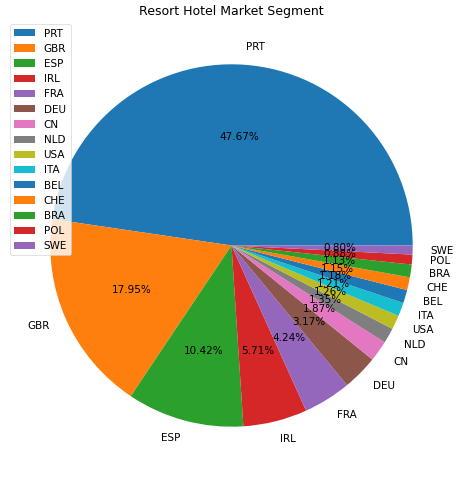

In [65]:
country_pie=df.Country.value_counts()
plt.figure(figsize=(30,12),dpi=50)
plt.pie(country_pie[0:15],labels=country_pie.index[0:15],autopct='%.2f%%')
plt.title('Resort Hotel Market Segment')
plt.legend()

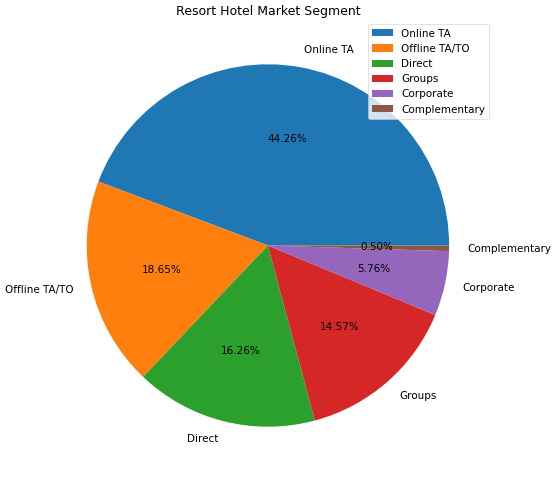

In [59]:
resort_segment=df.MarketSegment.value_counts()
plt.figure(figsize=(30,12),dpi=50)
plt.pie(resort_segment,labels=resort_segment.index,autopct='%.2f%%')
plt.title('Resort Hotel Market Segment')
plt.legend()

Text(0, 0.5, 'Cancellation rate')

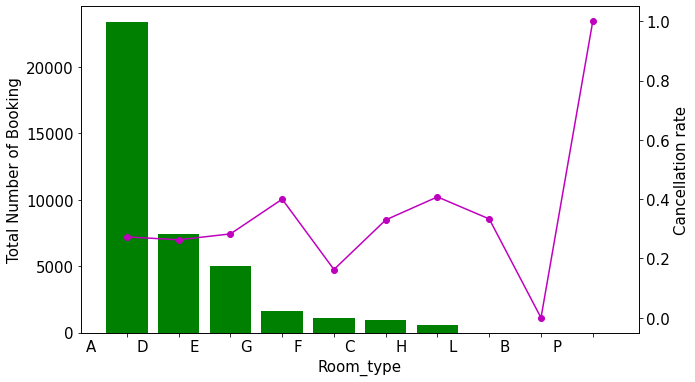

In [67]:
ReservedRoomType = list(
    df.groupby('ReservedRoomType').size().sort_values(ascending=False).head(20).index)
df[df.ReservedRoomType.isin(ReservedRoomType)].shape[0] / df.shape[0]

fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()
plt.xticks(range(len(ReservedRoomType)),ReservedRoomType)
ax1.bar(
    range(len(ReservedRoomType)), data[data.ReservedRoomType.isin(ReservedRoomType)].groupby('ReservedRoomType').size().sort_values(ascending=False),color='green')
ax1.set_xlabel('Room_type')
ax1.set_ylabel('Total Number of Booking')
ax2.plot(
    range(len(ReservedRoomType)),
    data[data.ReservedRoomType.isin(ReservedRoomType)].groupby('ReservedRoomType')['IsCanceled'].mean().loc[ReservedRoomType], 'mo-')
ax2.set_ylabel('Cancellation rate')

Text(0, 0.5, 'Cancellation rate')

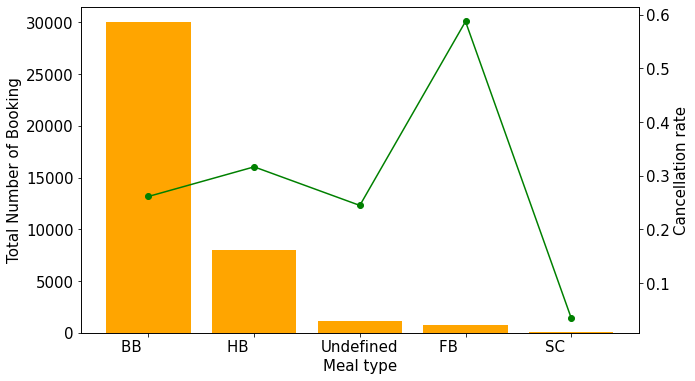

In [68]:
Meal = list(
    df.groupby('Meal').size().sort_values(ascending=False).head(20).index)
df[df.Meal.isin(Meal)].shape[0] / df.shape[0]

fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()
plt.xticks(range(len(Meal)),Meal)
ax1.bar(
    range(len(Meal)), data[data.Meal.isin(Meal)].groupby('Meal').size().sort_values(ascending=False),color='orange')
ax1.set_xlabel('Meal type')
ax1.set_ylabel('Total Number of Booking')
ax2.plot(
    range(len(Meal)),
    data[data.Meal.isin(Meal)].groupby('Meal')['IsCanceled'].mean().loc[Meal], 'go-')
ax2.set_ylabel('Cancellation rate')

Text(0, 0.5, 'Cancellation rate')

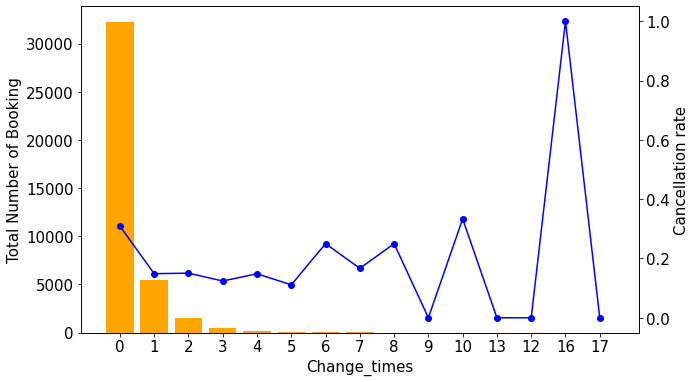

In [69]:
book_changes = list(
    df.groupby('BookingChanges').size().sort_values(ascending=False).head(20).index)
df[df.BookingChanges.isin(book_changes)].shape[0] / df.shape[0]

fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()
plt.xticks(range(len(book_changes)),book_changes)
ax1.bar(
    range(len(book_changes)), data[data.BookingChanges.isin(book_changes)].groupby('BookingChanges').size().sort_values(ascending=False),color='orange')
ax1.set_xlabel('Change_times')
ax1.set_ylabel('Total Number of Booking')
ax2.plot(
    range(len(book_changes)),
    data[data.BookingChanges.isin(book_changes)].groupby('BookingChanges')['IsCanceled'].mean().loc[book_changes], 'bo-')
ax2.set_ylabel('Cancellation rate')

No handles with labels found to put in legend.


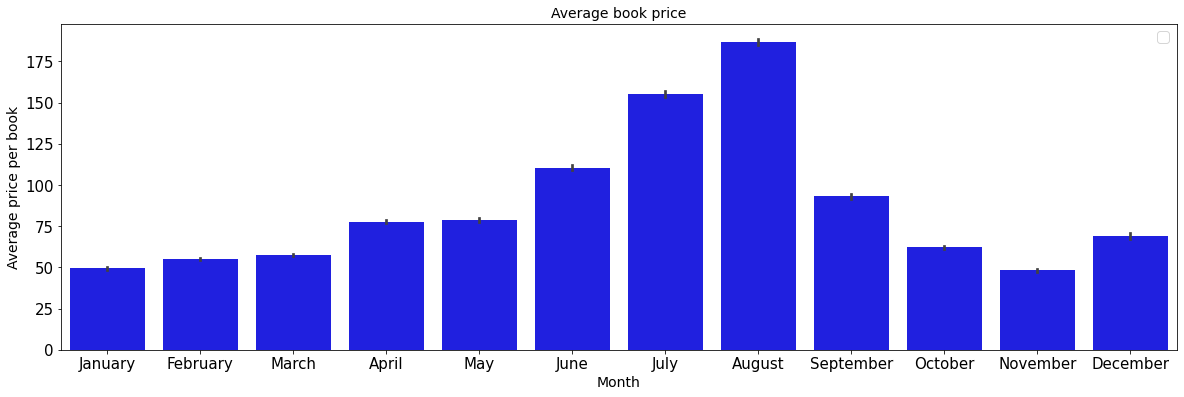

In [70]:
plt.figure(figsize=(20, 6))
Months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
sns.barplot(x = 'ArrivalDateMonth', y = 'ADR', data = df, order=Months, color='blue')
df_sorted = df.sort_values('ArrivalDateMonth') 
plt.title('Average book price',fontsize=14)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Average price per book',fontsize=14)
plt.legend()
plt.show()
